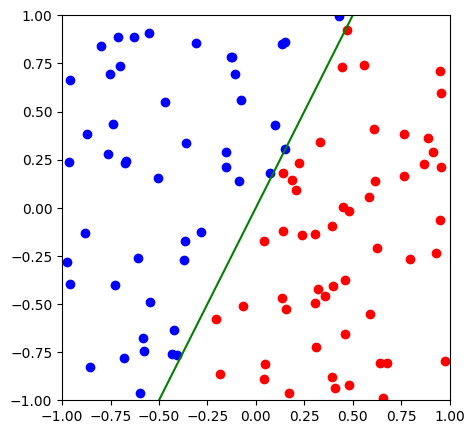

In [2]:
# Generate a bunch of 2D data where label 0 is a circle and label 1 is a square
# The separator is the line y = 2x
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
def gen_data(n):
    X = np.random.rand(n, 2) * 2 - 1
    y = (X[:, 1] > 2 * X[:, 0]).astype(int)
    return X, y
X, y = gen_data(100)
# plot all the x data, labeled by y
plt.figure(figsize=(5, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
# plot the separator
x = np.linspace(-1, 1, 100)
plt.plot(x, 2 * x, 'g')

Epoch 0, loss 0.6731709241867065
Epoch 100, loss 0.013088691048324108
Epoch 200, loss 0.002964376239106059
Epoch 300, loss 0.0010434654541313648
Epoch 400, loss 0.0005087270401418209
Epoch 500, loss 0.0002971701032947749
Epoch 600, loss 0.00019336749392095953
Epoch 700, loss 0.00013521288929041475
Epoch 800, loss 9.940926975104958e-05
Epoch 900, loss 7.571843161713332e-05
Epoch 1000, loss 5.891609180252999e-05
Epoch 1100, loss 4.710014763986692e-05
Epoch 1200, loss 3.8620306440861896e-05
Epoch 1300, loss 3.215436663595028e-05
Epoch 1400, loss 2.713147841859609e-05
Epoch 1500, loss 2.3109865651349537e-05
Epoch 1600, loss 1.9860332031385042e-05
Epoch 1700, loss 1.722314664220903e-05
Epoch 1800, loss 1.503675139247207e-05
Epoch 1900, loss 1.3232799574325327e-05
Epoch 2000, loss 1.1684362107189372e-05
Epoch 2100, loss 1.0382661457697395e-05
Epoch 2200, loss 9.266012057196349e-06
Epoch 2300, loss 8.303916729346383e-06
Epoch 2400, loss 7.464407190127531e-06
Epoch 2500, loss 6.738993761246093

/tmp/ipykernel_941534/3871863662.py:53: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X_mesh, Y_mesh, Z, levels=[0], colors='black', label='NN boundary', linestyles='dashed')


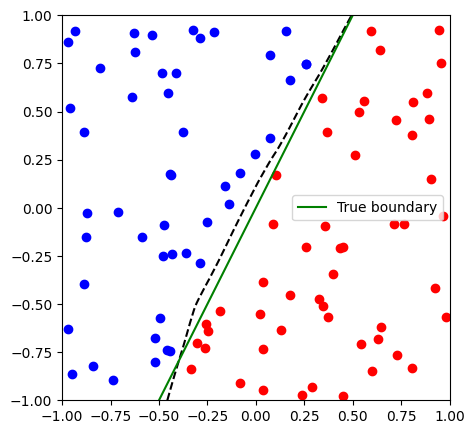

Epoch 0, loss 0.6942270398139954
Epoch 100, loss 0.03290233016014099
Epoch 200, loss 0.016436133533716202
Epoch 300, loss 0.009875860065221786
Epoch 400, loss 0.00641387514770031
Epoch 500, loss 0.0044019934721291065
Epoch 600, loss 0.00311127956956625
Epoch 700, loss 0.002294459380209446
Epoch 800, loss 0.0017436568159610033
Epoch 900, loss 0.0013505552196875215
Epoch 1000, loss 0.0010746537009254098
Epoch 1100, loss 0.0008657247526571155
Epoch 1200, loss 0.0007049450068734586
Epoch 1300, loss 0.0005850119632668793
Epoch 1400, loss 0.0004907267284579575
Epoch 1500, loss 0.00041506148409098387
Epoch 1600, loss 0.0003538680321071297
Epoch 1700, loss 0.000288222887320444
Epoch 1800, loss 0.00018714672478381544
Epoch 1900, loss 0.00012463328312151134
Epoch 2000, loss 8.793624874670058e-05
Epoch 2100, loss 6.527957884827629e-05
Epoch 2200, loss 5.034548667026684e-05
Epoch 2300, loss 3.988596290582791e-05
Epoch 2400, loss 3.236722113797441e-05
Epoch 2500, loss 2.6744055503513664e-05
Epoch 2

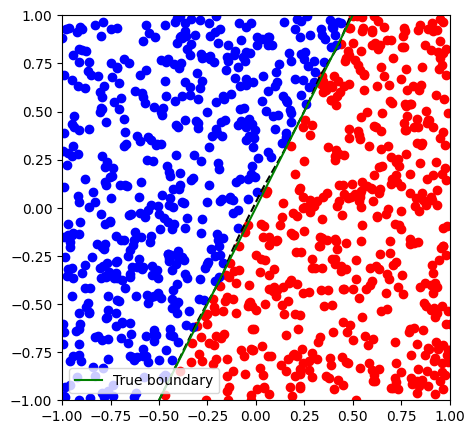

In [2]:
# now lets learn a neural network version of this separator
import torch
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 1)
        self.sigmoid = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        return x

def train_nn(X, y, num_epochs=1000):
    net = Net()
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(net.parameters())

    # Lets fit the data
    torch_X = torch.from_numpy(X).float()
    torch_y = torch.from_numpy(y).float().view(-1, 1)
    for epoch in range(4000):
        optimizer.zero_grad()
        output = net(torch_X)
        loss = criterion(output, torch_y)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, loss {loss.item()}')
    # Now visualize it
    output = net(torch_X).detach().numpy().squeeze()
    plt.figure(figsize=(5, 5))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b')

    # now lets try to draw the boundary that the neural net thinks is there
    x_space = np.linspace(-1, 1, 100)
    y_space = np.linspace(-1, 1, 100)
    X_mesh, Y_mesh = np.meshgrid(x_space, y_space)
    Z = np.zeros_like(X_mesh)
    for i in range(100):
        for j in range(100):
            Z[i, j] = net(torch.tensor([X_mesh[i, j], Y_mesh[i, j]]).float()).item()
    # create a level 0 contour with a label
    plt.contour(X_mesh, Y_mesh, Z, levels=[0], colors='black', label='NN boundary', linestyles='dashed')
    plt.plot(x_space, 2 * x_space, color='g', label='True boundary')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.legend()

    plt.show()
    
X, y = gen_data(100)
train_nn(X, y)

# now the same thing but with a lot of data
X, y = gen_data(1000)
train_nn(X, y, num_epochs=500)


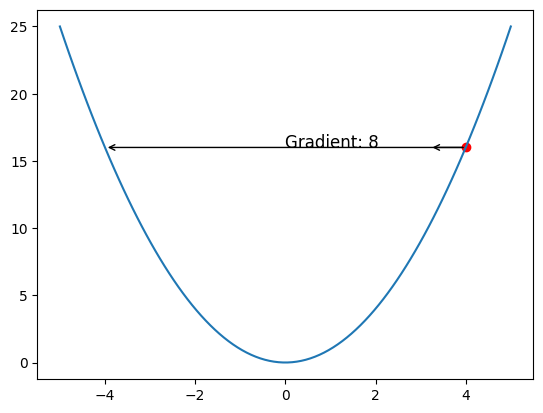

x: 3.2, loss: 10.240000000000002
x: 2.56, loss: 6.5536
x: 2.048, loss: 4.194304
x: 1.6384, loss: 2.68435456
x: 1.31072, loss: 1.7179869184000003
x: 1.0485760000000002, loss: 1.0995116277760004
x: 0.8388608000000002, loss: 0.7036874417766403
x: 0.6710886400000001, loss: 0.45035996273704976
x: 0.5368709120000001, loss: 0.2882303761517119
x: 0.4294967296000001, loss: 0.18446744073709562


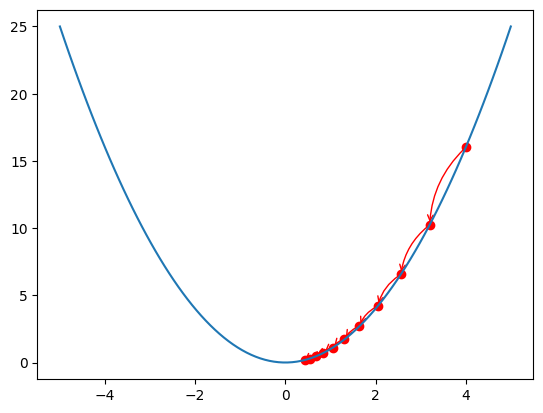

x: -0.4724464025600002, loss: 0.22320560329188577
x: 0.5196910428160002, loss: 0.27007877998318175
x: -0.5716601470976004, loss: 0.3267953237796501
x: 0.6288261618073605, loss: 0.39542234177337676
x: -0.6917087779880966, loss: 0.4784610335457859
x: 0.7608796557869064, loss: 0.5789378505904011
x: -0.8369676213655972, loss: 0.7005147992143858
x: 0.9206643835021571, loss: 0.8476229070494069
x: -1.012730821852373, loss: 1.0256237175297827
x: 1.1140039040376102, loss: 1.241004698211037
x: -1.2254042944413712, loss: 1.5016156848353548
x: 1.3479447238855082, loss: 1.816954978650779
x: -1.482739196274059, loss: 2.198515524167443
x: 1.631013115901465, loss: 2.6602037842426056
x: -1.7941144274916117, loss: 3.2188465789335536
x: 1.973525870240773, loss: 3.8948043605096
x: -2.17087845726485, loss: 4.712713276216616
x: 2.3879663029913356, loss: 5.702383064222107
x: -2.626762933290469, loss: 6.89988350770875
x: 2.8894392266195164, loss: 8.34885904432759


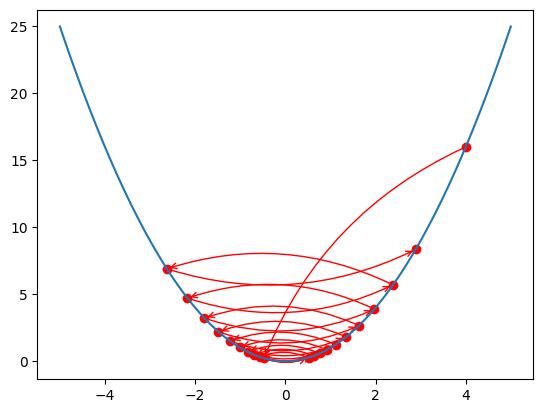

In [27]:
# minimize a parabola using gradient descent. At the first step, also plot the gradient on top of it
# also plot the iterates
from matplotlib.patches import FancyArrowPatch
# Function to add a curved arrow between two points
def draw_curved_arrow(ax, start, end, color='r'):
    arrow = FancyArrowPatch(start, end, connectionstyle="arc3,rad=0.2", 
                            arrowstyle='->', color=color, mutation_scale=10)
    ax.add_patch(arrow)
    
def parabola(x):
    return x ** 2

initial_x = 4
def grad(x):
    return 2 * x

x = initial_x
lr = 0.1
x_iters = [x]
for i in range(10):
    if i == 0:
        # plot an arrow pointing left of magnitude equal to the gradient
        fig, ax = plt.subplots()
        plt.plot(np.linspace(-5, 5, 100), parabola(np.linspace(-5, 5, 100)))
        plt.scatter(x, parabola(x), c='r')
        ax.annotate('', xy=(x - grad(x), parabola(x)), xytext=(x, parabola(x)),
            arrowprops=dict(facecolor='black', arrowstyle='->'), label='Gradient')
        # add a label for the gradient
        plt.text(x - grad(x) / 2, parabola(x), f'Gradient: {grad(x)}', fontsize=12)
        ax.annotate('', xy=(x - lr * grad(x), parabola(x)), xytext=(x, parabola(x)),
            arrowprops=dict(facecolor='red', arrowstyle='->'), label='Gradient step')
        plt.show()
    x -= lr * grad(x)
    x_iters.append(x)
    print(f'x: {x}, loss: {parabola(x)}')

fig, ax = plt.subplots()
x_space = np.linspace(-5, 5, 100)
plt.plot(x_space, parabola(x_space))
plt.scatter(x_iters, [parabola(x) for x in x_iters], c='r')
# draw an arrow connecting each point with the prior point
for i in range(len(x_iters) - 1):
    start = (x_iters[i], parabola(x_iters[i]))
    end = (x_iters[i + 1], parabola(x_iters[i + 1]))
    draw_curved_arrow(ax, start, end)
plt.show()

lr = 1.05
x_iters = [initial_x]
for i in range(20):
    x -= lr * grad(x)
    x_iters.append(x)
    print(f'x: {x}, loss: {parabola(x)}')
fig, ax = plt.subplots()
x_space = np.linspace(-5, 5, 100)
plt.plot(x_space, parabola(x_space))
plt.scatter(x_iters, [parabola(x) for x in x_iters], c='r')
# draw an arrow connecting each point with the prior point
for i in range(len(x_iters) - 1):
    start = (x_iters[i], parabola(x_iters[i]))
    end = (x_iters[i + 1], parabola(x_iters[i + 1]))
    draw_curved_arrow(ax, start, end)
plt.show()

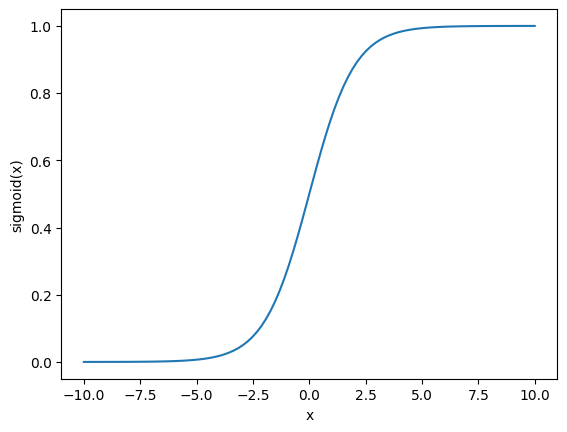

In [4]:
# plot a sigmoid
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.plot(x, y)
plt.show()
